# Capacitated Power Dominating Set

### Parameters:
TIMEOUT = 900 (seconds)</br>
NRUNS = 5</br>
ALL-Z = False (not all vertices can propagate)</br>

## Import packages

In [1]:
from tools import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read data

In [2]:
df_stats1 = pd.read_csv("stats1.csv", index_col=0)
df_stats2 = pd.read_csv("stats2.csv", index_col=0)
df_stats3 = pd.read_csv("stats3.csv", index_col=0)

df = pd.concat([df_stats1, df_stats2, df_stats3], ignore_index=True)

Clean the data.

In [3]:
# Change column name "omega" to "k"
df = df.rename(columns={"omega": "k"})

# Handle instances where no solution was found
df.loc[df.upper_bound == -1.0, "upper_bound"] = float("nan")
df.loc[df.gap == 100.0, "gap"] = float("nan")

# Handle instance with timeout
timeout = 900000000 # 900000000 microseconds = 900 seconds = 15 minutes
df.loc[df.result == "Timeout", "t_solver"] = timeout

# Transform microseconds to seconds
timeout = int(timeout / 1000000)
df.t_solver = df.t_solver / 1000000
df.t_callback = df.t_callback / 1000000

# Clean instance names
df.instance = df.instance.apply(lambda x: x.split("/")[-1])
df.instance = df.instance.apply(lambda x: x.split(".")[0])
df.instance = df.instance.apply(lambda x: x.removeprefix("case_"))
df.instance = df.instance.apply(lambda x: x.removeprefix("case"))

# Remove instances with less than 200 vertices
df = df[df.vertices >= 200]

# Rename solvers
solver_map = {"brimkov": 'BRI-IP',
              "jovanovic": 'JOV-IP',
              "forts": 'FORT-IP',
              "efpss": "EFPS-IP",
              "efpss-inp": "EFPS-IP-IN",
              "efpss-outp": "EFPS-IP-OUT",
              "efpss-inp-outp": "EFPS-IP-IN-OUT",
              "efpss-outp-init": "EFPS-IP-OUT-INIT",
              "fpss": "FPS-IP"
              }
df.solver = df.solver.apply(lambda x: solver_map[x])

# Sort values
df = df.sort_values(["vertices", "solver", "k", "run"], ignore_index=True)
df

,solver,instance,vertices,edges,propagating_vertices,k,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints
0,BRI-IP,illinois200,200,245,44,0,1074,1304,0,156.0,156.0,0.000000,Optimal,1,0.061905,0,0.000000,0
1,BRI-IP,illinois200,200,245,44,0,1074,1304,1,156.0,156.0,0.000000,Optimal,1,0.058577,0,0.000000,0
2,BRI-IP,illinois200,200,245,44,0,1074,1304,2,156.0,156.0,0.000000,Optimal,1,0.058100,0,0.000000,0
3,BRI-IP,illinois200,200,245,44,0,1074,1304,3,156.0,156.0,0.000000,Optimal,1,0.058234,0,0.000000,0
4,BRI-IP,illinois200,200,245,44,0,1074,1304,4,156.0,156.0,0.000000,Optimal,1,0.058140,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,FPS-IP,13659pegase,13659,18625,4024,4,42539,15751,4,3630.0,3630.0,0.000000,Optimal,77134,718.382497,159,0.856042,13599
14925,FPS-IP,13659pegase,13659,18625,4024,5,39374,15118,0,3316.0,3317.0,0.000301,Timeout,200388,900.000000,155,0.572874,11764
14926,FPS-IP,13659pegase,13659,18625,4024,5,39374,15118,1,3316.0,3317.0,0.000301,Timeout,173869,900.000000,158,0.694008,11648
14927,FPS-IP,13659pegase,13659,18625,4024,5,39374,15118,2,3316.0,3317.0,0.000301,Timeout,186828,900.000000,126,0.574440,11721


## Check solutions

In [4]:
def opt_val(serie):
    if serie.result == "Optimal":
        return serie.upper_bound
    else:
        return float("nan")

df["opt_val"] = df[["result", "upper_bound"]].apply(opt_val, axis=1)
df

,solver,instance,vertices,edges,propagating_vertices,k,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,opt_val
0,BRI-IP,illinois200,200,245,44,0,1074,1304,0,156.0,156.0,0.000000,Optimal,1,0.061905,0,0.000000,0,156.0
1,BRI-IP,illinois200,200,245,44,0,1074,1304,1,156.0,156.0,0.000000,Optimal,1,0.058577,0,0.000000,0,156.0
2,BRI-IP,illinois200,200,245,44,0,1074,1304,2,156.0,156.0,0.000000,Optimal,1,0.058100,0,0.000000,0,156.0
3,BRI-IP,illinois200,200,245,44,0,1074,1304,3,156.0,156.0,0.000000,Optimal,1,0.058234,0,0.000000,0,156.0
4,BRI-IP,illinois200,200,245,44,0,1074,1304,4,156.0,156.0,0.000000,Optimal,1,0.058140,0,0.000000,0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,FPS-IP,13659pegase,13659,18625,4024,4,42539,15751,4,3630.0,3630.0,0.000000,Optimal,77134,718.382497,159,0.856042,13599,3630.0
14925,FPS-IP,13659pegase,13659,18625,4024,5,39374,15118,0,3316.0,3317.0,0.000301,Timeout,200388,900.000000,155,0.572874,11764,NaN
14926,FPS-IP,13659pegase,13659,18625,4024,5,39374,15118,1,3316.0,3317.0,0.000301,Timeout,173869,900.000000,158,0.694008,11648,NaN
14927,FPS-IP,13659pegase,13659,18625,4024,5,39374,15118,2,3316.0,3317.0,0.000301,Timeout,186828,900.000000,126,0.574440,11721,NaN


In [5]:
for instance in df.instance.unique():
    df1 = df[df.instance == instance]
    for l in df1.k.unique():
        df2 = df1[df1.k == l]
        lb = df2.lower_bound.max()
        ub = df2.upper_bound.min()
        if (isnan(df2.opt_val.min())):
            # Check lower and upper bounds
            assert(lb <= ub)            
        else:
            #print(instance, omega, df2.opt_val.min(), df2.opt_val.max())
            assert(df2.opt_val.min() == df2.opt_val.max())
            val = df2.opt_val.max()
            # Check lower and upper bounds
            assert(lb <= val)
            assert(val <= ub)
print("Checks passed :)")

Checks passed :)


## Compute $k^*$

$k^*$ is the minumum $k$ such that the optimal value of CPDS is equal to the optimal value of PDS.

In [6]:
df4 = df.sort_values(["vertices", "instance", "opt_val", "k"], ignore_index=True).groupby("instance").head(1)
k_star = dict(zip(df4.instance, df4.k))
print(k_star)

{'illinois200': 8, '300': 8, 'south_carolina500': 9, '1354pegase': 8, '1888rte': 8, '1951rte': 11, 'Texas': 12, 'GB2224': 9, '2383wp': 6, '2736sp': 6, '2737sop': 6, '2746wop': 7, '2746wp': 7, '2848rte': 9, '2868rte': 9, '2869pegase': 9, '3012wp': 7, '3120sp': 6, '3375wp': 7, '6468rte': 10, '6470rte': 10, '6495rte': 10, '6515rte': 10, '9241pegase': 9, 'Western': 11, '13659pegase': 4}


In [7]:
def classify(x):
    if x.k/x.k_star <= 1/3:
        return "low"
    elif x.k/x.k_star <= 2/3:
        return "medium"
    else:
        return "high"

df["k_star"] = df["instance"].apply(lambda x: k_star[x])
df["k_coef"] = df["k"] / df["k_star"]
df["k_class"] = df[["k","k_star"]].apply(classify, axis=1)

Remove instances with $k$ greater than $k^*$.

In [8]:
df["k_star"] = df["instance"].apply(lambda x: k_star[x])
df = df[df.k <= df.k_star]
df

,solver,instance,vertices,edges,propagating_vertices,k,variables,constraints,run,lower_bound,...,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,opt_val,k_star,k_coef,k_class
0,BRI-IP,illinois200,200,245,44,0,1074,1304,0,156.0,...,Optimal,1,0.061905,0,0.000000,0,156.0,8,0.0,low
1,BRI-IP,illinois200,200,245,44,0,1074,1304,1,156.0,...,Optimal,1,0.058577,0,0.000000,0,156.0,8,0.0,low
2,BRI-IP,illinois200,200,245,44,0,1074,1304,2,156.0,...,Optimal,1,0.058100,0,0.000000,0,156.0,8,0.0,low
3,BRI-IP,illinois200,200,245,44,0,1074,1304,3,156.0,...,Optimal,1,0.058234,0,0.000000,0,156.0,8,0.0,low
4,BRI-IP,illinois200,200,245,44,0,1074,1304,4,156.0,...,Optimal,1,0.058140,0,0.000000,0,156.0,8,0.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14920,FPS-IP,13659pegase,13659,18625,4024,4,42539,15751,0,3630.0,...,Optimal,113025,851.856033,155,0.632803,13397,3630.0,4,1.0,high
14921,FPS-IP,13659pegase,13659,18625,4024,4,42539,15751,1,3629.0,...,Timeout,137735,900.000000,181,0.887238,13405,NaN,4,1.0,high
14922,FPS-IP,13659pegase,13659,18625,4024,4,42539,15751,2,3629.0,...,Timeout,148468,900.000000,207,1.004647,13602,NaN,4,1.0,high
14923,FPS-IP,13659pegase,13659,18625,4024,4,42539,15751,3,3629.0,...,Timeout,135833,900.000000,149,0.729765,13431,NaN,4,1.0,high


## Average results

In [9]:
def count_opt(serie):
    return serie[serie == "Optimal"].count()

def gap_all(serie):
    return serie.mean()

def gap_feas(serie):
    return serie[serie > 0].mean()

def time_all(serie):
    return serie.mean()

def time_opt(serie):
    return serie[serie < timeout].mean()

df2 = df.groupby(["instance","vertices","edges","propagating_vertices","solver",
                  "k","variables","constraints"], as_index=False).agg(
    result = ("result", count_opt),
    gap_all = ("gap", gap_all),
    gap_feas = ("gap", gap_feas),
    time_all = ("t_solver", time_all),
    time_opt = ("t_solver", time_opt),
    upper_bound = ("upper_bound", "mean"),
    lower_bound = ("lower_bound", "mean"),
    k_star = ("k_star", "min")
)
df2 = df2.sort_values(["vertices", "instance", "solver", "k"])
df2

,instance,vertices,edges,propagating_vertices,solver,k,variables,constraints,result,gap_all,gap_feas,time_all,time_opt,upper_bound,lower_bound,k_star
1781,illinois200,200,245,44,BRI-IP,0,1074,1304,5,0.000000,NaN,0.058991,0.058991,156.0,156.0,8
1782,illinois200,200,245,44,BRI-IP,1,1002,1232,5,0.000000,NaN,0.080285,0.080285,97.0,97.0,8
1783,illinois200,200,245,44,BRI-IP,2,892,1177,5,0.000000,NaN,0.109061,0.109061,68.0,68.0,8
1784,illinois200,200,245,44,BRI-IP,3,799,1146,5,0.000000,NaN,0.175205,0.175205,57.0,57.0,8
1785,illinois200,200,245,44,BRI-IP,4,719,1126,5,0.000000,NaN,0.112723,0.112723,50.0,50.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,13659pegase,13659,18625,4024,FPS-IP,0,63414,27318,0,0.004346,0.004346,900.000000,NaN,10123.5,10082.0,4
82,13659pegase,13659,18625,4024,FPS-IP,1,57882,21786,0,0.000509,0.000509,900.000000,NaN,7465.0,7461.2,4
83,13659pegase,13659,18625,4024,FPS-IP,2,50620,18155,0,0.001709,0.001709,900.000000,NaN,5148.6,5139.8,4
84,13659pegase,13659,18625,4024,FPS-IP,3,46015,16620,0,0.000433,0.000433,900.000000,NaN,4158.0,4156.2,4


## Number of solved instances

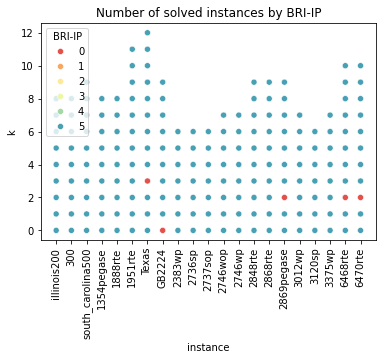

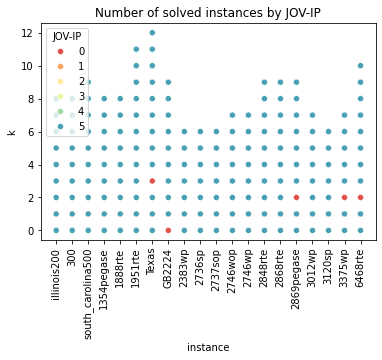

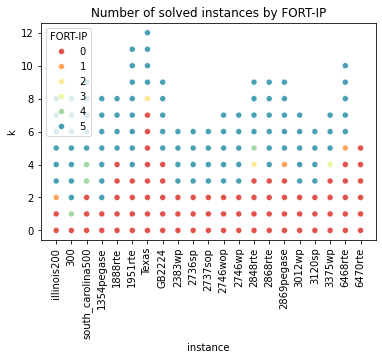

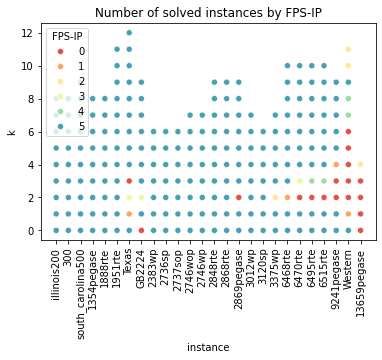

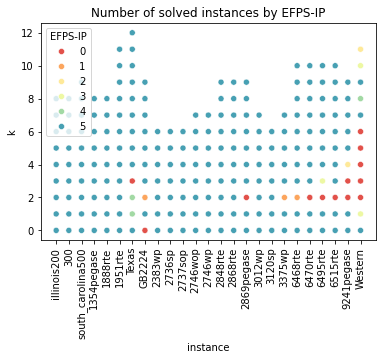

In [10]:
solvers = ["BRI-IP","JOV-IP","FORT-IP","FPS-IP","EFPS-IP"]
for s in solvers:
    show_solved_instances(df2, s)

## FPS-IP vs. EFPS-IP

### Best solver

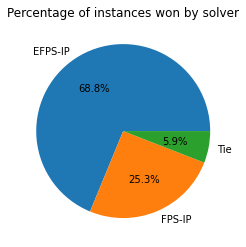

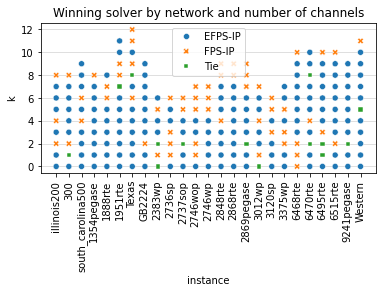

In [11]:
solvers = ["EFPS-IP","FPS-IP"]
show_best_solver(df2, solvers, ties=True)

### Cumulative execution time

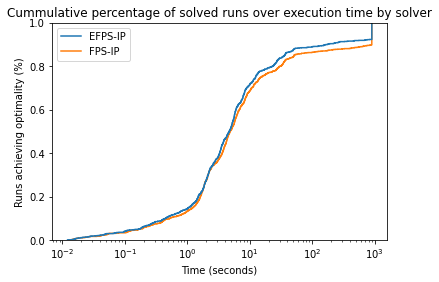

In [12]:
show_cumulative_time(df, solvers)

### Average execution time

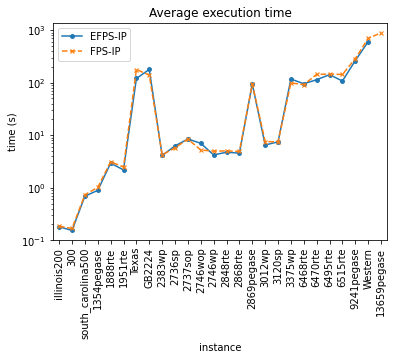

In [13]:
show_execution_time(df, solvers, log_scale=True)

### Performance profile

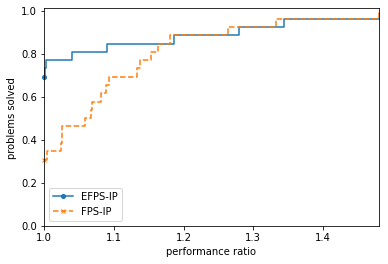

In [14]:
show_performance_profile(df2, solvers)

## EFPS-IP: InP and OutP

### Best solver

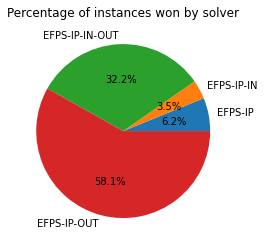

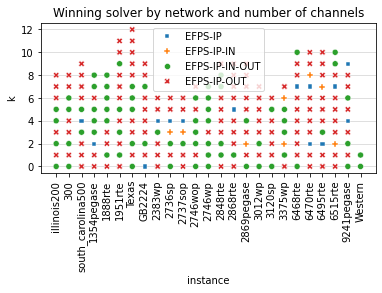

In [15]:
solvers = ["EFPS-IP", "EFPS-IP-IN", "EFPS-IP-IN-OUT", "EFPS-IP-OUT"]
show_best_solver(df2, solvers)

### Cumulative execution time

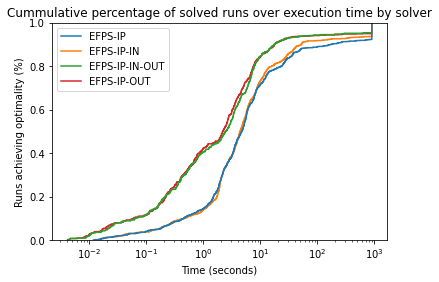

In [16]:
show_cumulative_time(df, solvers)

### Average execution time

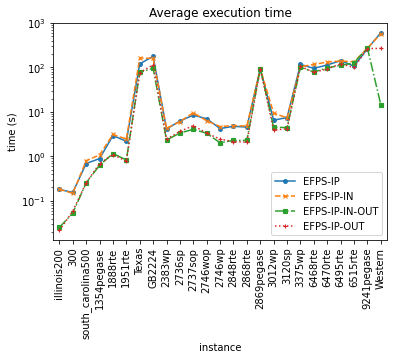

In [17]:
show_execution_time(df, solvers, log_scale=True)

### Performance profile

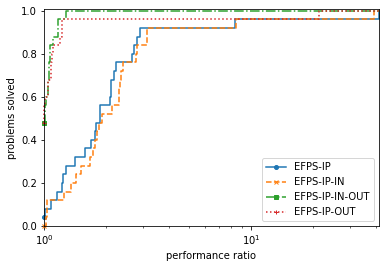

In [18]:
show_performance_profile(df2, solvers, log_scale=True)

## EFPS-IP: Init

### Best solver

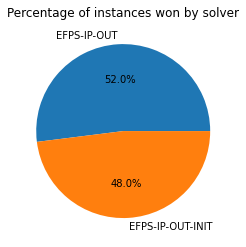

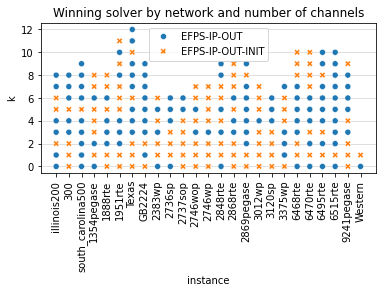

In [19]:
solvers = ["EFPS-IP-OUT", "EFPS-IP-OUT-INIT"]
show_best_solver(df2, solvers)

### Cumulative execution time

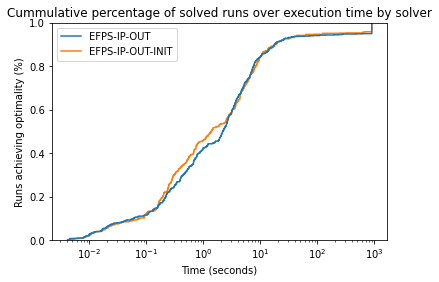

In [20]:
show_cumulative_time(df, solvers)

### Average execution time

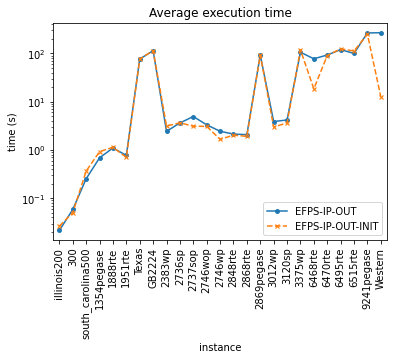

In [21]:
show_execution_time(df, solvers, log_scale=True)

### Performance profile

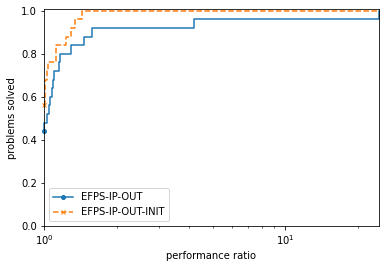

In [22]:
show_performance_profile(df2, solvers, log_scale=True)

## BRI-IP vs. JOV-IP vs. FORT-IP vs. EFPS-IP

### Best solver

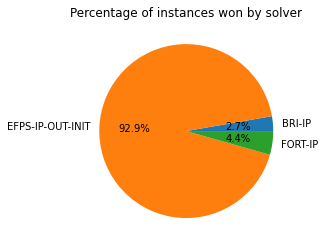

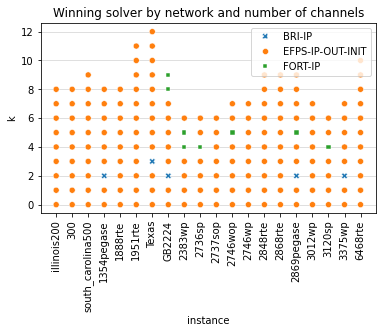

In [23]:
solvers = ["BRI-IP", "EFPS-IP-OUT-INIT", "FORT-IP", "JOV-IP"]
show_best_solver(df2, solvers)

### Cumulative execution time

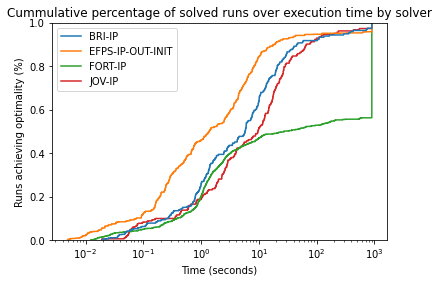

In [24]:
show_cumulative_time(df, solvers)

### Average execution time

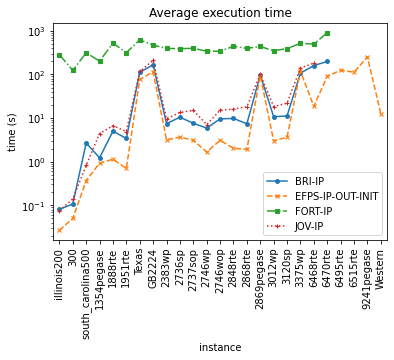

In [25]:
show_execution_time(df, solvers, log_scale=True)

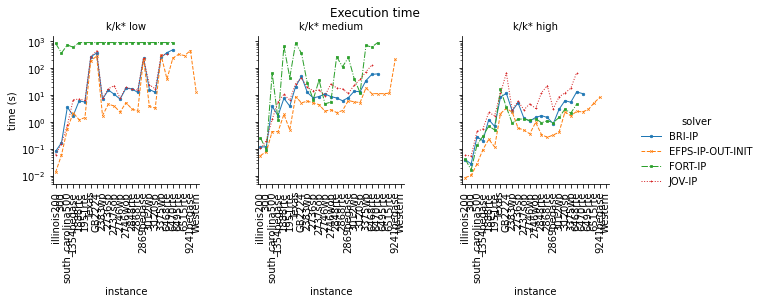

In [26]:
show_execution_time(df, solvers, log_scale=True, grid=True)

### Performance profile

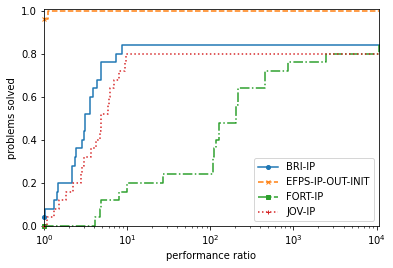

In [27]:
show_performance_profile(df2, solvers, log_scale=True)